# Project - Programming for Data Analysis 

## Problem statement 

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose. 

Speciﬁcally, in this project you should: 

- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four diﬀerent variables. 
- Investigate the types of variables involved, their likely distributions, and their relationships with each other. 
- Synthesise/simulate a data set as closely matching their properties as possible. 
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook. 

Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own ﬁles. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. The next section gives an example project idea.


## Example project idea 

the performance of students studying a ten-credit module. 

most interesting variable - grade
number of hours on average a student studies per week (hours), 
the number of times they log onto Moodle in the ﬁrst three weeks of term (logins), 
and their previous level of degree qualiﬁcation (qual) 

The hours and grade variables will be non-negative real number with two decimal places, d to grade. 
logins will be a non-zero integer 
and qual will be a categorical variable with four possible values: none, bachelors, masters, or phd. 
four hours per week with a standard deviation of a quarter of an hour 

and that a normal distribution is an acceptable model of such a variable. 
Likewise, I investigate the other four variables, 
and I also look at the relationships between the variables. 

I devise an algorithm (or method) to generate such a data set, 
simulating values of the four variables for two-hundred students. 
I detail all this work in my notebook, 
and then I add some code in to generate a data set with those properties.


## Researching a real world application of interest

### Choosing a dataset

Going through various articles on datasets and data collections across the spectrum of topics, a personal topic of interest is the factors having an effect and influence  automotive fuel efficiency.

Having reviewed several articles on the topic, there seems to be many technical reasons for less than optimal fuel efficiency and the technical issues really comes down to maintenance or a lack thereof. A lot of the other factors comes down to driving style and really becomes temperament and age related. Other factors coming nit play is the size of the vehicle, distance of the commute and weather conditions, so all in all a reasonable set of conditions that can make an interesting dataset.

There is an overwhelming amount of variables that can influence the overall fuel efficiency of a vehicle and very granular maintenance specifics like oil and fuel quality, tyres, air conditioner use and travel distance. The basic factors influencing the outcome is the engine size, the weight, speed, drive style, aerodynamics and mechanical resistance. 

So as a first pass this is rough idea of data that should allow one to make reasonable estimates on fuel consumption.

Make  |Model  |Sub-Class|Type|CC |Cylinders|Gender|Age|Drivestyle|Serviced|Commute
------|-------|---------|----|---|---------|------|---|------- --|--------|-------
Toyota|Corolla|Verso    |MPV |1.6|4        |Male  |55 |Rational  |Annually|32  

Maybe subclass and Type is over complicating the matter.



### Defining the data values and types for the dataset


Variable  |Description                 |Data Type  |Distributions
----------|----------------------------|-----------|-------------
Make      |Manufacturer                |Text       |Geometric
Model     |Model                       |Text       |    - 
CC        |Engine size in CC           |0.8-4.5    |Geometric
Cylinder  |Cylinders inferred from CC  |2-12       |    - 
Gender    |Gender of driver            |male/female|Bernoulli
Age       |Age of driver to infer style|16-99      |Normal
Drivestyle|Driver Type                 |text       |    - 
Services  |Services annually           |yes/no     |Bernoulli
Commute   |Distance of commute         |1-100      |Gaussian
Type      |Urban, Rural, Highway       |text       |Bernoulli

### Generating a list of manufacturers 
So to get an idea of where values should go, the TEA18 dataset, referenced below, was used as a guideline for distribution of types vehicle types.

In [11]:
import pandas as pd                              # Import pandas for dataframe features
pd.options.mode.chained_assignment = None        # disable warnings en errors on dataframe usage
cars=pd.read_csv('data/CarsIrelandbyCC.csv')       # import the TEA18 dataset to establish benchmarks
makes=cars[cars['Make'].str.contains('All ')==False] # filter out collection and keep manufacturers only
#makes=df[df['Make'].str.contains('All')==True]  # test result
#df.sort_values('All', ascending=False)          # sort for esy comparison
makes['pct']=((cars['All']/168327)*100)            # calculate a percentage for reference 
makes[['Make','All','pct']].sort_values('All', ascending=False)#.head(10)   # display the list in descending order

,Make,All,pct
41,Volkswagen,21070,12.517303
14,Ford,18657,11.083783
39,Toyota,16114,9.573033
26,Nissan,12941,7.688012
16,Hyundai,12440,7.390377
3,Audi,8815,5.236831
34,Skoda,8508,5.054448
30,Renault,7444,4.422345
5,BMW,7384,4.386700
27,Opel,7350,4.366501


So looking at the list of new motor vehicles purchased in 2018, sorted by total sales, the list seems to approximate a geometric distribution. The distribution of engine sizes seems to be similarly distributed, however regardless of the distribution type, ideally what I would like to reproduce is a random generated list from 41 manufacturers that will always yield around __12.5%__ Volkswagen's, __11%__ Ford's followed by __9.6%__ Toyota's etc..

Several hours were spent to try and reproduce the result and one sample of such an attempt is below trying to use distributions to yield this result.

In [12]:
import numpy.random as rnd
d=rnd.noncentral_chisquare(10,1,30)**2*rnd.randint(3,size=30)
d

array([207.98259533, 274.31115863, 266.44421344, 272.2367013 ,
       190.50638819,   0.        , 117.06896483,   0.        ,
         0.        ,   0.        ,   0.        , 554.03964129,
        34.35513216,  31.04700807,   0.        ,   0.        ,
        23.73016409,  83.72480467,  72.19487263,   0.        ,
         0.        ,  68.41234843,  91.35010025,   0.        ,
        31.67238194, 259.51560457, 378.62583328,   0.        ,
       109.54284236, 153.56563395])

After countless hours working on the problem, and testing all kinds of distributions, the final and most elegant solution has already been created and secretly exists in the numpy.random.choice library option at the fourth parameter __p__, _probability_. This important point was completely missed in dealing with this library and only stumbling on the phrase _"probability"_ and parameter __p__ in the parameter description documentation, yielded the desired results.

```python
choice(a, size=None, replace=True, p=None)

Parameters
-----------
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given the sample assumes a uniform distribution over all
    entries in a.
```

### Determining the winners

In [14]:
makes=cars[cars['Make'].str.contains('All makes')==False]
m=makes.sort_values('All', ascending=False)
m=list(m['Make'])
print(m)

['Volkswagen', 'Ford', 'Toyota', 'Nissan', 'Hyundai', 'Audi', 'Skoda', 'Renault', 'BMW', 'Opel', 'Kia', 'Peugeot', 'Vauxhall', 'Mercedes Benz', 'Citroen', 'Dacia', 'Mazda', 'Seat', 'Honda', 'Volvo', 'Suzuki', 'Mitsubishi', 'Mini', 'Land Rover', 'Fiat', 'Lexus', 'Jaguar', 'Saab', 'Subaru', 'All other makes', 'Porsche', 'Alfa Romeo', 'Ssangyong', 'Jeep', 'Smart', 'Chevrolet', 'Rover', 'Chrysler', 'Daihatsu', 'Daewoo', 'Austin', 'Dodge']


So arranging by makes in order of popularity:
```python
makes = ['Volkswagen', 'Ford', 'Toyota', 'Nissan', 'Hyundai', 'Audi', 'Skoda', 'Renault', 'BMW', 'Opel', 'Kia', 'Peugeot', 'Vauxhall', 'Mercedes Benz', 'Citroen', 'Dacia', 'Mazda', 'Seat', 'Honda', 'Volvo', 'Suzuki', 'Mitsubishi', 'Mini', 'Land Rover', 'Fiat', 'Lexus', 'Jaguar', 'Saab', 'Subaru', 'All other makes', 'Porsche', 'Alfa Romeo', 'Ssangyong', 'Jeep', 'Smart', 'Chevrolet', 'Rover', 'Chrysler', 'Daihatsu', 'Daewoo', 'Austin', 'Dodge']
```

So in order to to create a realistic simulation resembling the finding a reasonably narrow and specific distribution must be followed.

### The working code

Testing the generator and distribution results

In [16]:
from collections import Counter as count # import the counter for validation of the generator
makes['pct']=((makes['All']/sum(makes['All']))) # create a percentage column value that adds up to one - required by propability
makes[['Make','All','pct']].sort_values('All', ascending=False) #sort the list and create lists for validation purposes
manufacturers=list(makes['Make']) # generate a manufacturers list from the makes dataframe
probability=list(makes['pct']) # create the probabbility distribution list for the list
#sum(probability)  # test the list forcompatibility to the fucntion requirements, i.e. mist add up to one
t=rnd.choice(manufacturers,1000,p=probability) # create a 1000 samples
count(t).most_common() # count and show them

[('Volkswagen', 115),
 ('Ford', 113),
 ('Toyota', 103),
 ('Hyundai', 91),
 ('Nissan', 87),
 ('Renault', 53),
 ('Skoda', 49),
 ('Audi', 47),
 ('Peugeot', 45),
 ('Opel', 41),
 ('BMW', 38),
 ('Kia', 34),
 ('Vauxhall', 31),
 ('Mazda', 22),
 ('Mercedes Benz', 21),
 ('Citroen', 20),
 ('Dacia', 16),
 ('Volvo', 15),
 ('Honda', 15),
 ('Seat', 10),
 ('Fiat', 7),
 ('Mini', 6),
 ('Land Rover', 6),
 ('Mitsubishi', 4),
 ('Suzuki', 3),
 ('Lexus', 3),
 ('Saab', 2),
 ('Subaru', 1),
 ('Jeep', 1),
 ('Jaguar', 1)]

This approach yields exactly what I was hoping to achieve and engine size can be derived in a similar fashion, bearing in mind that all manufacturers might not have all engine sizes.

### Distilling Engine sizes

So in order to add engine sizes to the mix, a review of the engine statistics and distributions is done.

In [17]:
makes=cars[cars['Make'].str.contains('All makes')==True]
makes

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
0,All makes,168327,881,10210,20204,15272,18800,43824,48599,7407,3130


To better make sense of this result, it's transposed and cleaned up and stored in a csv file for easier reference and access.

In [18]:
ccd=pd.read_csv('data/cc_dist.csv').sort_values('pct', ascending=False)
ccd

,cc,count,pct
6,2000,48599,0.288718
5,1600,43824,0.260350
2,1300,20204,0.120028
4,1500,18800,0.111687
3,1400,15272,0.090728
1,1000,10210,0.060656
7,2400,7407,0.044004
8,>2400,3130,0.018595
0,<900,881,0.005234


The surprise is that the most common engine size, contrary to popular believe, is a 2000 cc engine, closely followed by the 1600 cc category. The gap in the catagories probably add to the big percentage in this grouping, however the two accounts for 50% of the vehicle population on the road. 45% is shared by 1000-1500 cc and 4.4% in 2.4% and the balance of around 1.5% fill in the rest, so very few above 2.4k cc and even less below 900cc.

<img src="img/cc_plot.png">

So a list in the order of popularity would be:

```python
cc_order=[2000,1600,1300,1500,1400,1000,2400,>2400,<900]
```

### Distribution of engine sizes and variance by manufacturers

The order of manufacturers is actually not that surprising, and when sorting the complete list by all or various engine size columns creates minor shifts. The shifting is really down to engine sizes more prevalent by specific manufacturers, for example Toyota would not make 900cc vehicles and the <900 cc category is dominated by Nissan, with relatively low volumes. 

It is quote surprising and then again very satisfying that this information can be derived from official datasets that is already publicly available. It is an area that must be explored more deeply and frequently for knowledge and gain.

For the sake of completeness before proceeding let us investigate the variance of manufacturers by engine sizes

In [19]:
makes=cars[cars['Make'].str.contains('All makes')==False]
makes.sort_values('<900', ascending=False).head(3)

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
26,Nissan,12941,496,53,5016,46,6164,1032,93,12,29
9,Dacia,3696,139,0,358,1,3198,0,0,0,0
30,Renault,7444,109,60,1843,45,4965,275,122,17,8


In [20]:
makes.sort_values('1000', ascending=False).head(3)

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
39,Toyota,16114,0,3176,284,6601,626,814,4325,178,110
41,Volkswagen,21070,6,1966,1959,483,399,9080,7119,2,56
16,Hyundai,12440,0,1478,1554,1311,20,1913,5388,772,4


In [21]:
makes.sort_values('1300', ascending=False).head(3)

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
26,Nissan,12941,496,53,5016,46,6164,1032,93,12,29
14,Ford,18657,0,1065,2544,486,1258,9638,3491,135,40
41,Volkswagen,21070,6,1966,1959,483,399,9080,7119,2,56


In [22]:
makes.sort_values('1400', ascending=False).head(3)

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
39,Toyota,16114,0,3176,284,6601,626,814,4325,178,110
27,Opel,7350,0,52,717,1961,39,1998,2581,2,0
16,Hyundai,12440,0,1478,1554,1311,20,1913,5388,772,4


In [23]:
makes.sort_values('1500', ascending=False).head(3)

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
26,Nissan,12941,496,53,5016,46,6164,1032,93,12,29
30,Renault,7444,109,60,1843,45,4965,275,122,17,8
9,Dacia,3696,139,0,358,1,3198,0,0,0,0


In [24]:
makes.sort_values('1600', ascending=False).head(3)

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
14,Ford,18657,0,1065,2544,486,1258,9638,3491,135,40
41,Volkswagen,21070,6,1966,1959,483,399,9080,7119,2,56
34,Skoda,8508,0,942,1499,43,225,4008,1791,0,0


In [25]:
makes.sort_values('2000', ascending=False).head(3)

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
41,Volkswagen,21070,6,1966,1959,483,399,9080,7119,2,56
3,Audi,8815,0,64,115,169,106,1360,6436,3,562
5,BMW,7384,37,0,0,0,458,52,6179,8,650


In [26]:
makes.sort_values('2400', ascending=False).head(3)

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
23,Mercedes Benz,4027,0,0,0,6,506,771,124,2287,333
22,Mazda,3049,0,0,0,326,289,170,197,2064,3
16,Hyundai,12440,0,1478,1554,1311,20,1913,5388,772,4


In [27]:
makes.sort_values('>2400', ascending=False).head(3)

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
5,BMW,7384,37,0,0,0,458,52,6179,8,650
3,Audi,8815,0,64,115,169,106,1360,6436,3,562
21,Lexus,657,0,0,0,0,0,0,126,56,475


### The conclusion on engine sizes

Manufacturer order vary some between engine sizes since everyone does not manufacture the same ranges or engines, for example BMW and Mercedes dominates above the 2.4 category. 

The second aspect is the extreme complexity introduced across 41 unique manufacturers to account for the engine sizes in the modelling and the net effect overall is almost negligible as a result of the overall combined manufacturer popularity distribution, for example while Mercedes dominates the 2400 cc category, the overall representation of the manufacturer is only 2.39%, so roughly half this number around 1.2% that I will assign a bigger engine to the wrong manufacturer. All in all the set will balance as the cc distribution probability  will still be accurately applied to the overall set. 

## Modelling the engine sizes

In [28]:
count(rnd.choice(ccd['cc'],1000,p=ccd['pct'])).most_common()
#ccd

[('2000', 291),
 ('1600', 259),
 ('1300', 125),
 ('1500', 108),
 ('1400', 97),
 ('1000', 58),
 ('2400', 37),
 ('>2400', 21),
 ('<900', 4)]

In [29]:
df=pd.DataFrame(t, columns=['Make']) # create the dataframe for my dataset
df['cc']=rnd.choice(ccd['cc'],1000,p=ccd['pct']) # append the engoine size tested above to the set.

In [30]:
#count(df['Make']).most_common()
#count(df['cc']).most_common() # Test the result
df

,Make,cc
0,BMW,2000
1,Volkswagen,1500
2,Renault,1600
3,Renault,2000
4,Citroen,1300
5,Dacia,<900
6,Volkswagen,1600
7,Peugeot,1600
8,Ford,1300
9,Seat,2000


## More Questions to answer

Variable  |Description                 |Data Type  |Distributions
----------|----------------------------|-----------|-------------
Make      |Manufacturer                |Text       |Geometric
Model     |Model                       |Text       |    - 
CC        |Engine size in CC           |0.8-4.5    |Geometric
Cylinder  |Cylinders inferred from CC  |2-12       |    - 
Gender    |Gender of driver            |male/female|Bernoulli
Age       |Age of driver to infer style|16-99      |Normal
Drivestyle|Driver Type                 |text       |    - 
Services  |Services annually           |yes/no     |Bernoulli
Commute   |Distance of commute         |1-100      |Gaussian
Type      |Urban, Rural, Highway       |text       |Bernoulli

The next couple of questions that needs to be addressed to make progress on the set is to see if we can determine the distributions of drivers by gender and age, the commute distance range for our datasets commuters and the service intervals observed by the average individuals. 

Then we need to see if we can infer drive styles from this data somehow. 


### Drivers by gender and age

So the data 
$
Age	Male	Female	Unknown	Total\\
17 - 20	19,498	12,136		31,634\\
21 - 24	58,592	48,373		106,965\\
25 - 29	110,192	103,236		213,428\\
30 - 39	292,016	278,584	1	570,601\\
40 - 49	276,956	251,080	2	528,038\\
50 - 59	230,547	199,151		429,698\\
60 - 69	181,719	140,179		321,898\\
70 - 79	95,496	67,540		163,036\\
80 and over	30,273	18,815	7	49,095\\
Total	1,295,289	1,119,094	10	2,414,393\\
$

In [39]:
d=pd.read_csv('data\P-TRANOM2013_2.5.csv')
d['pct']=d['Total']/sum(d['Total'])*100
d

,Age,Male,Female,Unknown,Total,pct
0,17 - 20,19498,12136,0,31634,1.310226
1,21 - 24,58592,48373,0,106965,4.430306
2,25 - 29,110192,103236,0,213428,8.839820
3,30 - 39,292016,278584,1,570601,23.633311
4,40 - 49,276956,251080,2,528038,21.870425
5,50 - 59,230547,199151,0,429698,17.797351
6,60 - 69,181719,140179,0,321898,13.332461
7,70 - 79,95496,67540,0,163036,6.752670
8,80 - 100,30273,18815,7,49095,2.033430


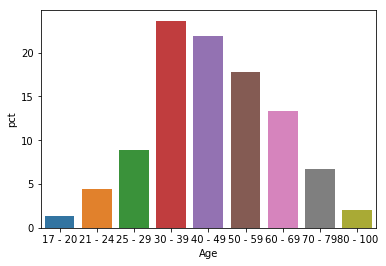

In [50]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as pl
%matplotlib inline

sns.barplot('Age','pct',data=d)

So it looks like this distribution might be achieved using a negative binomial.

In [133]:
n=100-(rnd.negative_binomial(2.015, 0.1, 150)+17)
n.sort()
n

array([15, 29, 31, 34, 35, 35, 36, 38, 39, 40, 40, 40, 40, 41, 42, 42, 45,
       46, 48, 49, 49, 49, 50, 50, 51, 51, 51, 52, 52, 54, 54, 54, 55, 55,
       55, 56, 56, 56, 57, 57, 58, 58, 59, 59, 59, 60, 60, 60, 60, 60, 61,
       62, 62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 64, 64, 64, 64, 64, 64,
       65, 65, 65, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68,
       69, 69, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71, 72, 72, 72, 72, 72,
       72, 73, 73, 73, 73, 73, 73, 74, 75, 75, 75, 75, 75, 75, 75, 76, 76,
       76, 77, 77, 77, 77, 77, 77, 78, 78, 78, 78, 78, 79, 79, 79, 79, 79,
       79, 79, 79, 79, 80, 80, 80, 80, 81, 81, 81, 82, 82, 82])

### Commute details - distance and type

### Drive style


### Observing of service intervals by distribution types

## References

1. __[5 Ways to Find Interesting Data Sets](https://www.dataquest.io/blog/5-ways-to-find-interesting-data-sets/)__
1. __[18 places to find data sets for data science projects](https://www.dataquest.io/blog/free-datasets-for-projects/)__
1. __[100+ Interesting Data Sets for Statistics](http://rs.io/100-interesting-data-sets-for-statistics/)__
1. __[19 Free Public Data Sets for Your First Data Science Project](https://www.springboard.com/blog/free-public-data-sets-data-science-project/)__
1. __[Cool Data Sets I’ve found](https://towardsdatascience.com/cool-data-sets-ive-found-adc17c5e55e1)__
1. __[Summary of Links to data sources](http://hdip-data-analytics.com/resources/data_sources)__
1. __[13 factors that increase fuel consumption](https://www.monitor.co.ug/Business/Auto/13-factors-that-increase-fuel-consumption/688614-2738644-b69hkkz/index.html)__
1. __[Many Factors Affect Fuel Economy](https://www.fueleconomy.gov/feg/factors.shtml)__
1. __[Want Your MPG? 10 Factors That Affect Fuel Economy](https://www.newgateschool.org/blog/entry/want-your-mpg-10-factors-that-affect-fuel-economy)__
1. __[How to Reduce Fuel Consumption](https://www.carsdirect.com/car-buying/10-ways-to-lower-engine-fuel-consumption)__
1. __[8 Main Causes of Bad Gas Mileage](https://www.carsdirect.com/car-buying/8-main-causes-of-bad-gas-mileage)__
1. __[Table 2.5     Number of current driving licences by age and gender at 31/12/2013](https://www.cso.ie/en/releasesandpublications/ep/p-tranom/transportomnibus2013/vehicles/driverandvehicletesting/)__
1. __[Cars Dataset](http://www.rpubs.com/dksmith01/cars)__
1. __[The 5 types of drivers on the road](https://rsadirect.ae/blog/5-types-drivers-road)__
1. __[TEA18 - Private Cars Licensed for the First Time](https://data.gov.ie/dataset/tea18-ime-by-engine-capacity-cc-car-make-emission-band-licensing-authority-year-and-statistic-b6cc)__
1. __[Github Markdown reference](https://guides.github.com/features/mastering-markdown/)__
1. __[Jupyter Markdown reference](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)__
1. __[Latex Reference](http://www.malinc.se/math/latex/basiccodeen.php)__